In [2]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.plotly as py
%matplotlib notebook

In [55]:
def SteepDescent(Q, p, x0, esp=1e-8):
    flag = True
    i = 0
    while flag:
        grad = Q*x0 + p
        temp1 = np.dot(x0.T, x0).sum()
        stepsize = (grad.T*grad)/(grad.T*Q*grad)
        x1 = x0 - stepsize[0,0]*grad
        flag = np.linalg.norm(x1 - x0) > esp
        x0 = x1
        i += 1
    
    print(i)
    print(x0)

In [64]:
def NewtonMethod(Q, p, x0, esp=1e-8):
    flag = True
    i = 0
    while flag:
        d = np.linalg.inv(Q)*(-(Q*x0+p))
        x1 = x0 + d
        flag = np.linalg.norm(x1 - x0) > esp
        x0 = x1
        i += 1
    
    print(i)
    print(x0)

In [70]:
Q = np.matrix([[1,0],[0,900]])
p = np.matrix(np.zeros(2)).T
x0= np.matrix([1000, 1]).T

In [71]:
SteepDescent(Q, p, x0)

8690
[[  3.31171276e-06]
 [  3.31171276e-09]]


In [72]:
NewtonMethod(Q, p, x0)

2
[[ 0.]
 [ 0.]]


<IPython.core.display.Javascript object>


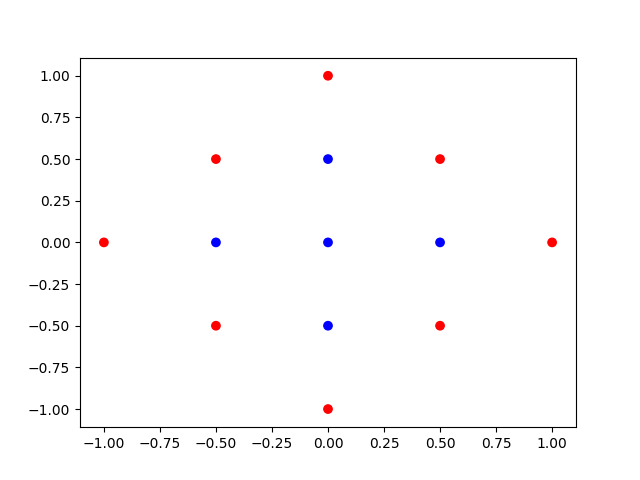

In [3]:
dataset = {'+':[np.matrix([   0,   0]).T,
                np.matrix([ 0.5,   0]).T,
                np.matrix([   0, 0.5]).T,
                np.matrix([-0.5,   0]).T,
                np.matrix([   0,-0.5]).T] ,
           '-':[np.matrix([ 0.5, 0.5]).T,
                np.matrix([ 0.5,-0.5]).T,
                np.matrix([-0.5, 0.5]).T,
                np.matrix([-0.5,-0.5]).T,
                np.matrix([   1,   0]).T,
                np.matrix([   0,   1]).T,
                np.matrix([  -1,   0]).T,
                np.matrix([   0,  -1]).T]}

x_p = np.array([np.array(v.T)[0,:] for v in dataset['+']])
x_n = np.array([np.array(v.T)[0,:] for v in dataset['-']])
y_p = np.array([1]*x_p.shape[0])
y_n = np.array([-1]*x_n.shape[0])
x, y = np.append(x_p, x_n, axis=0), np.append(y_p, y_n)

from matplotlib.colors import ListedColormap

cmap_bold = ListedColormap(['#FF0000', '#0000FF'])
plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap_bold)
plt.show()

In [4]:
def PerceptronDualForm(x, y):
    pdtable = []
    for i in range(len(y)):
        pd = []
        for j in range(len(y)):
            pd.append(prod(x[i,:], x[j,:]))
        pdtable.append(pd)
    pdtable = np.array(pdtable)
    
    R = []
    for l in range(len(y)):
        r = 0
        for i in range(len(x[l])):
            r += x[l][i]**2
        R.append(r)
    R = np.max(R)
    
    alpha = np.zeros(x.shape[0])
    b = 0
    flag = True
    while flag:
        flag = False
        for i in range(len(y)):
            proj = 0
            for j in range(len(y)):
                proj += alpha[j]*y[j]*pdtable[j,i]
            proj += b
            if y[i]*proj <= 0 :
                flag = True
                alpha[i] += 1
                b += y[i]*(R**2)
    return alpha, b

In [5]:
def prod(v1, v2):    
    pd = 0
    for i in range(len(v1)):
        pd += v1[i]*v2[i]
    
    return pd**2

In [6]:
a, b = PerceptronDualForm(x, y)

In [7]:
a

array([ 10.,   1.,   0.,   0.,   0.,   5.,   5.,   0.,   0.,   0.,   0.,
         0.,   0.])

In [8]:
h = .05

x_min, x_max = -1.5, 1.5
y_min, y_max = -1.5, 1.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
#xx
#np.c_[xx.ravel(), yy.ravel()]

<IPython.core.display.Javascript object>


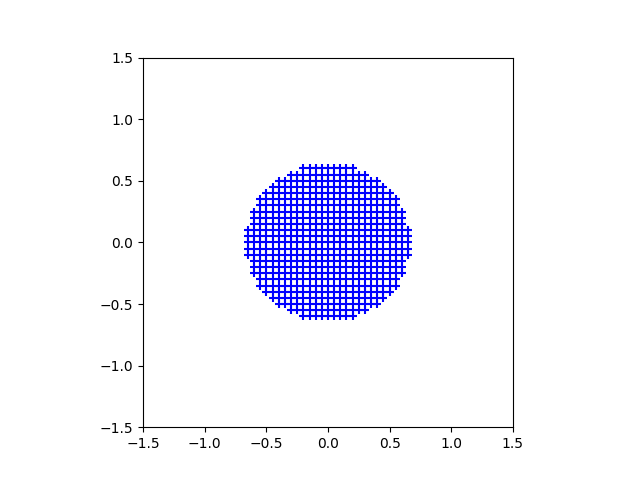

In [9]:
points = np.c_[xx.ravel(), yy.ravel()]

p_list = []
for i in range(points.shape[0]):
    v = points[i,:]
    proj = 0
    for j in range(len(a)):
        proj += a[j]*y[j]*prod(v, x[j,:])
    proj += b
    if proj > 0:
        p_list.append(v)
p_list = np.array(p_list)

plt.scatter(p_list[:, 0], p_list[:, 1], color='b', marker='+')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
#plt.axis('equal')
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

In [202]:
len(p_list)

2123

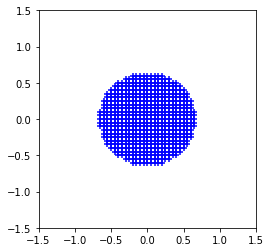

<IPython.core.display.Javascript object>


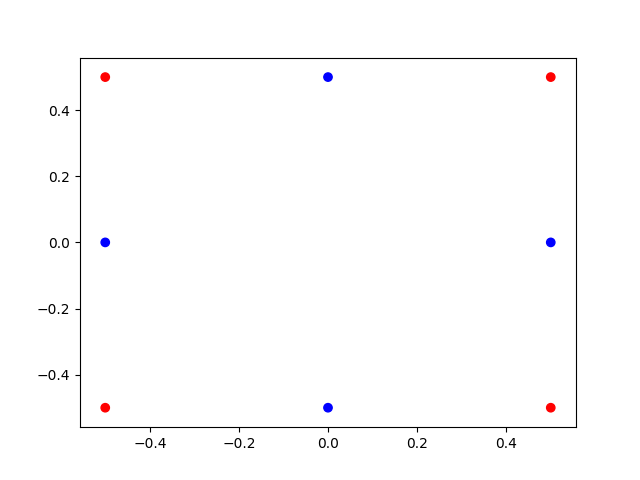

In [11]:
dataset = {'+':[np.matrix([ 0.5,   0]).T,
                np.matrix([   0, 0.5]).T,
                np.matrix([-0.5,   0]).T,
                np.matrix([   0,-0.5]).T] ,
           '-':[np.matrix([ 0.5, 0.5]).T,
                np.matrix([ 0.5,-0.5]).T,
                np.matrix([-0.5, 0.5]).T,
                np.matrix([-0.5,-0.5]).T] }

x_p = np.array([np.array(v.T)[0,:] for v in dataset['+']])
x_n = np.array([np.array(v.T)[0,:] for v in dataset['-']])
y_p = np.array([1]*x_p.shape[0])
y_n = np.array([-1]*x_n.shape[0])
x, y = np.append(x_p, x_n, axis=0), np.append(y_p, y_n)

from matplotlib.colors import ListedColormap

cmap_bold = ListedColormap(['#FF0000', '#0000FF'])
plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap_bold)
plt.show()

In [12]:
a, b = PerceptronDualForm(x, y)

<IPython.core.display.Javascript object>


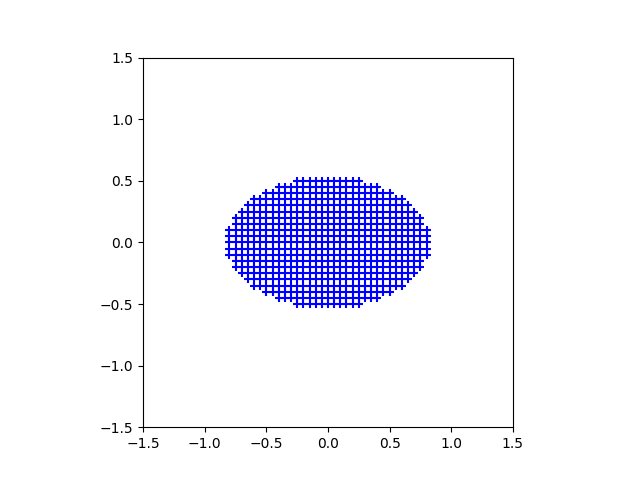

In [13]:
points = np.c_[xx.ravel(), yy.ravel()]

p_list = []
for i in range(points.shape[0]):
    v = points[i,:]
    proj = 0
    for j in range(len(a)):
        proj += a[j]*y[j]*prod(v, x[j,:])
    proj += b
    if proj > 0:
        p_list.append(v)
p_list = np.array(p_list)

plt.scatter(p_list[:, 0], p_list[:, 1], color='b', marker='+')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
#plt.axis('equal')
#cmap_bold = ListedColormap(['#FF0000', '#0000FF'])
#plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap_bold)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

In [14]:
dataset = {'+':[np.matrix([   0,   0]).T,
                np.matrix([ 0.5,   0]).T,
                np.matrix([   0, 0.5]).T,
                np.matrix([-0.5,   0]).T,
                np.matrix([   0,-0.5]).T] ,
           '-':[np.matrix([ 0.5, 0.5]).T,
                np.matrix([ 0.5,-0.5]).T,
                np.matrix([-0.5, 0.5]).T,
                np.matrix([-0.5,-0.5]).T,
                np.matrix([   1,   0]).T,
                np.matrix([   0,   1]).T,
                np.matrix([  -1,   0]).T,
                np.matrix([   0,  -1]).T]}

x_p = np.array([np.array(v.T)[0,:] for v in dataset['+']])
x_n = np.array([np.array(v.T)[0,:] for v in dataset['-']])
y_p = np.array([1]*x_p.shape[0])
y_n = np.array([-1]*x_n.shape[0])
x, y = np.append(x_p, x_n, axis=0), np.append(y_p, y_n)

In [15]:
def phi(x):
    vectors = []
    for i in range(x.shape[0]):
        xi = x[i,:]
        vectors.append([-xi[0]*xi[1], xi[0]**2, xi[0]*xi[1], xi[1]**2])
    return np.array(vectors)

In [19]:
phix = phi(x)

In [238]:
x

array([[ 0. ,  0. ],
       [ 0.5,  0. ],
       [ 0. ,  0.5],
       [-0.5,  0. ],
       [ 0. , -0.5],
       [ 0.5,  0.5],
       [ 0.5, -0.5],
       [-0.5,  0.5],
       [-0.5, -0.5],
       [ 1. ,  0. ],
       [ 0. ,  1. ],
       [-1. ,  0. ],
       [ 0. , -1. ]])

In [237]:
phix

array([[-0.  ,  0.  ,  0.  ,  0.  ],
       [-0.  ,  0.25,  0.  ,  0.  ],
       [-0.  ,  0.  ,  0.  ,  0.25],
       [ 0.  ,  0.25, -0.  ,  0.  ],
       [ 0.  ,  0.  , -0.  ,  0.25],
       [-0.25,  0.25,  0.25,  0.25],
       [ 0.25,  0.25, -0.25,  0.25],
       [ 0.25,  0.25, -0.25,  0.25],
       [-0.25,  0.25,  0.25,  0.25],
       [-0.  ,  1.  ,  0.  ,  0.  ],
       [-0.  ,  0.  ,  0.  ,  1.  ],
       [ 0.  ,  1.  , -0.  ,  0.  ],
       [ 0.  ,  0.  , -0.  ,  1.  ]])

In [16]:
def prodwx(w, x):
    p = 0
    for i in range(len(w)):
        p += w[i]*x[i]
    return p

In [17]:
def PerceptronPrimalForm(x, y):
    R = []
    for l in range(len(y)):
        r = 0
        for i in range(len(x[l])):
            r += x[l][i]**2
        R.append(r**(1/2))
    R = np.max(R)
    
    w = np.zeros(x.shape[1]) 
    b = 0
    flag = True
    while flag:
        flag = False
        for i in range(len(y)):
            xi = x[i,:]
            proj = 0
            for j in range(len(w)):
                proj += w[j] * xi[j]
            proj += b
            if y[i]*proj <= 0 :
                flag = True
                w += y[i]*xi
                b += y[i]*(R**2)
    return w, b

In [20]:
w, b = PerceptronPrimalForm(phix, y)

<IPython.core.display.Javascript object>


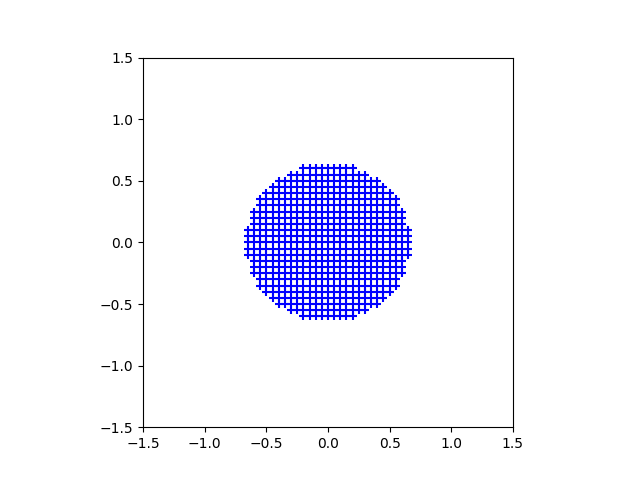

In [22]:
points = np.c_[xx.ravel(), yy.ravel()]
phi_points = phi(points)

p_list = []
for i in range(points.shape[0]):
    v = phi_points[i,:]
    proj = 0
    for j in range(len(w)):
        proj += w[j]*v[j]
    proj += b
    if proj > 0:
        p_list.append(points[i])
p_list = np.array(p_list)

plt.scatter(p_list[:, 0], p_list[:, 1], color='b', marker='+')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
#plt.axis('equal')
#cmap_bold = ListedColormap(['#FF0000', '#0000FF'])
#plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap_bold)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

<IPython.core.display.Javascript object>


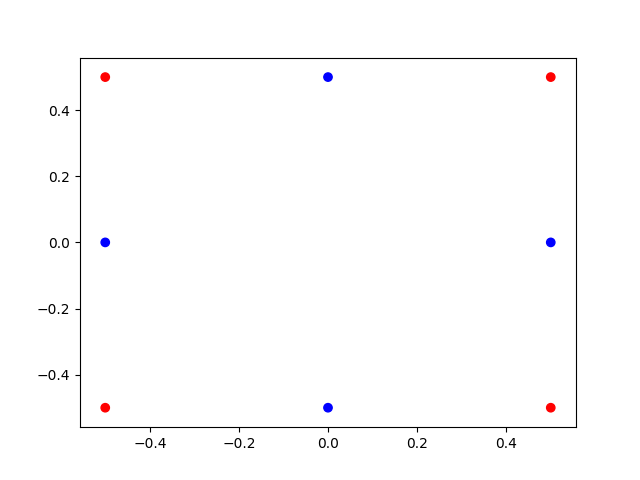

In [29]:
dataset = {'+':[np.matrix([ 0.5,   0]).T,
                np.matrix([   0, 0.5]).T,
                np.matrix([-0.5,   0]).T,
                np.matrix([   0,-0.5]).T] ,
           '-':[np.matrix([ 0.5, 0.5]).T,
                np.matrix([ 0.5,-0.5]).T,
                np.matrix([-0.5, 0.5]).T,
                np.matrix([-0.5,-0.5]).T] }

x_p = np.array([np.array(v.T)[0,:] for v in dataset['+']])
x_n = np.array([np.array(v.T)[0,:] for v in dataset['-']])
y_p = np.array([1]*x_p.shape[0])
y_n = np.array([-1]*x_n.shape[0])
x, y = np.append(x_p, x_n, axis=0), np.append(y_p, y_n)

from matplotlib.colors import ListedColormap

cmap_bold = ListedColormap(['#FF0000', '#0000FF'])
plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap_bold)
plt.show()

In [24]:
phix = phi(x)
w, b = PerceptronPrimalForm(phix, y)

<IPython.core.display.Javascript object>


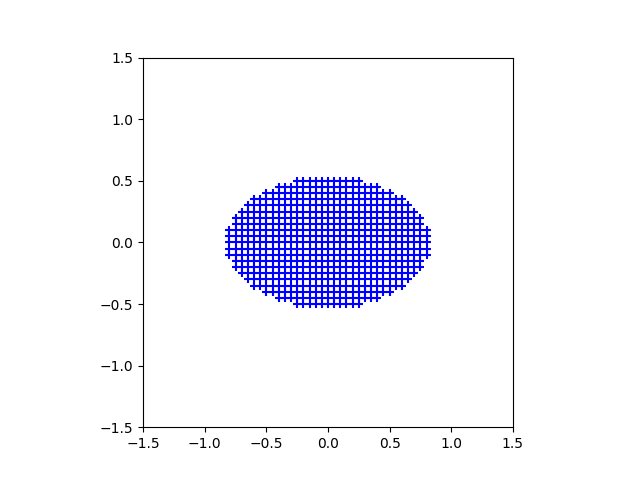

In [30]:
points = np.c_[xx.ravel(), yy.ravel()]
phi_points = phi(points)

p_list = []
for i in range(points.shape[0]):
    v = phi_points[i,:]
    proj = 0
    for j in range(len(w)):
        proj += w[j]*v[j]
    proj += b
    if proj > 0:
        p_list.append(points[i])
p_list = np.array(p_list)

plt.scatter(p_list[:, 0], p_list[:, 1], color='b', marker='+')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
#plt.axis('equal')
#cmap_bold = ListedColormap(['#FF0000', '#0000FF'])
#plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap_bold)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

In [266]:
ma = np.array([84, 88, 76, 86, 85, 90, 72, 87, 77, 82]) / 100
mb = np.array([72, 84, 82, 80, 81, 80, 75, 86, 75, 78]) / 100

In [285]:
d = ma-mb
n = len(d)

In [282]:
t = np.mean(d) / (np.std(d, ddof=1)/np.sqrt(len(d)))

In [283]:
t

1.9912154640797275

In [278]:
np.std(np.array([0, 3, 6]),ddof =1)

3.0

In [289]:
import scipy as sp
import scipy.stats

In [290]:
tt = np.mean(d)/(np.std(d, ddof=1)/np.sqrt(n))  # t-statistic for mean
pval = scipy.stats.t.sf(np.abs(tt), n-1)*2  # two-sided pvalue = Prob(abs(t)>tt)
print('t-statistic = {:6.3f} pvalue = {:6.4f}'.format(tt, pval))

t-statistic =  1.991 pvalue = 0.0776


In [291]:
scipy.stats.ttest_ind(ma, mb)

Ttest_indResult(statistic=1.471936564918932, pvalue=0.15830686042904477)

In [292]:
scipy.stats.ttest_1samp(d, 0.0)

Ttest_1sampResult(statistic=1.991215464079727, pvalue=0.077644394087836105)

<IPython.core.display.Javascript object>


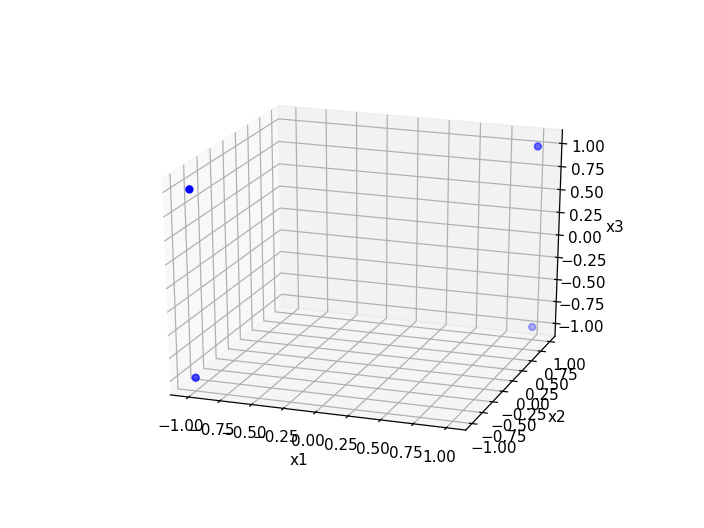

In [296]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = np.array([[1, 1, 1], [1, 1, -1], [-1, -1, 1], [-1, -1, -1]])
ax.scatter(x[:,0], x[:,1], x[:,2], c='b', marker='o')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('x3')

plt.show()